In [2]:
### Project1

import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Task1

data_election = pd.read_csv("election_train.csv")
print(data_election)

      Year State             County      Office       Party    Votes
0     2018    AZ      Apache County  US Senator  Democratic  16298.0
1     2018    AZ      Apache County  US Senator  Republican   7810.0
2     2018    AZ     Cochise County  US Senator  Democratic  17383.0
3     2018    AZ     Cochise County  US Senator  Republican  26929.0
4     2018    AZ    Coconino County  US Senator  Democratic  34240.0
...    ...   ...                ...         ...         ...      ...
2405  2018    WY  Sweetwater County  US Senator  Republican   8577.0
2406  2018    WY       Uinta County  US Senator  Democratic   1371.0
2407  2018    WY       Uinta County  US Senator  Republican   4713.0
2408  2018    WY    Washakie County  US Senator  Democratic    588.0
2409  2018    WY    Washakie County  US Senator  Republican   2423.0

[2410 rows x 6 columns]


In [4]:
## Task1

data_election = pd.pivot_table(data_election, index=['State','County','Year','Office'], columns=['Party'], values=['Votes'], aggfunc=np.sum)
data_election = data_election.reset_index()

print(data_election)

      State             County  Year      Office      Votes           
Party                                            Democratic Republican
0        AZ      Apache County  2018  US Senator    16298.0     7810.0
1        AZ     Cochise County  2018  US Senator    17383.0    26929.0
2        AZ    Coconino County  2018  US Senator    34240.0    19249.0
3        AZ        Gila County  2018  US Senator     7643.0    12180.0
4        AZ      Graham County  2018  US Senator     3368.0     6870.0
...     ...                ...   ...         ...        ...        ...
1200     WY      Platte County  2018  US Senator      801.0     2850.0
1201     WY    Sublette County  2018  US Senator      668.0     2653.0
1202     WY  Sweetwater County  2018  US Senator     3943.0     8577.0
1203     WY       Uinta County  2018  US Senator     1371.0     4713.0
1204     WY    Washakie County  2018  US Senator      588.0     2423.0

[1205 rows x 6 columns]


In [5]:
## Task2

data_election['County'] = data_election['County'].replace({' County':''}, regex=True)
print(data_election)

      State      County  Year      Office      Votes           
Party                                     Democratic Republican
0        AZ      Apache  2018  US Senator    16298.0     7810.0
1        AZ     Cochise  2018  US Senator    17383.0    26929.0
2        AZ    Coconino  2018  US Senator    34240.0    19249.0
3        AZ        Gila  2018  US Senator     7643.0    12180.0
4        AZ      Graham  2018  US Senator     3368.0     6870.0
...     ...         ...   ...         ...        ...        ...
1200     WY      Platte  2018  US Senator      801.0     2850.0
1201     WY    Sublette  2018  US Senator      668.0     2653.0
1202     WY  Sweetwater  2018  US Senator     3943.0     8577.0
1203     WY       Uinta  2018  US Senator     1371.0     4713.0
1204     WY    Washakie  2018  US Senator      588.0     2423.0

[1205 rows x 6 columns]


In [6]:
## Task2

data_demographics = pd.read_csv("demographics_train.csv")
print(data_demographics)

          State      County   FIPS  Total Population  \
0     Wisconsin   La Crosse  55063            117538   
1      Virginia   Alleghany  51005             15919   
2       Indiana    Fountain  18045             16741   
3          Ohio      Geauga  39055             94020   
4     Wisconsin     Jackson  55053             20566   
...         ...         ...    ...               ...   
1211    Montana     Lincoln  30053             19268   
1212       Ohio  Tuscarawas  39157             92579   
1213   Michigan     Newaygo  26123             47957   
1214  Tennessee  Lauderdale  47097             27261   
1215      Texas      Sabine  48403             10367   

      Citizen Voting-Age Population  Percent White, not Hispanic or Latino  \
0                                 0                              90.537528   
1                             12705                              91.940449   
2                             12750                              95.705155   
3              

In [7]:
## Task2

us_state_dictionary = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

data_demographics = data_demographics.replace({'State':us_state_dictionary})
print(data_demographics)

     State      County   FIPS  Total Population  \
0       WI   La Crosse  55063            117538   
1       VA   Alleghany  51005             15919   
2       IN    Fountain  18045             16741   
3       OH      Geauga  39055             94020   
4       WI     Jackson  55053             20566   
...    ...         ...    ...               ...   
1211    MT     Lincoln  30053             19268   
1212    OH  Tuscarawas  39157             92579   
1213    MI     Newaygo  26123             47957   
1214    TN  Lauderdale  47097             27261   
1215    TX      Sabine  48403             10367   

      Citizen Voting-Age Population  Percent White, not Hispanic or Latino  \
0                                 0                              90.537528   
1                             12705                              91.940449   
2                             12750                              95.705155   
3                                 0                              95.837056 

In [8]:
## Task2

# Convert to lower and capitalize for County
data_election['County'] = data_election['County'].str.lower()
data_demographics['County'] = data_demographics['County'].str.lower()

# merge action
data_merged=pd.merge(data_election, data_demographics, on=['State','County'], how='inner')
print(data_merged)


     State      County (State, )  (County, )  (Year, )  (Office, )  \
0       AZ      apache        AZ      apache      2018  US Senator   
1       AZ     cochise        AZ     cochise      2018  US Senator   
2       AZ    coconino        AZ    coconino      2018  US Senator   
3       AZ        gila        AZ        gila      2018  US Senator   
4       AZ      graham        AZ      graham      2018  US Senator   
...    ...         ...       ...         ...       ...         ...   
1195    WY      platte        WY      platte      2018  US Senator   
1196    WY    sublette        WY    sublette      2018  US Senator   
1197    WY  sweetwater        WY  sweetwater      2018  US Senator   
1198    WY       uinta        WY       uinta      2018  US Senator   
1199    WY    washakie        WY    washakie      2018  US Senator   

      (Votes, Democratic)  (Votes, Republican)   FIPS  Total Population  ...  \
0                 16298.0               7810.0   4001             72346  ...   

//anaconda3/envs/cs418/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning:

merging between different levels can give an unintended result (2 levels on the left, 1 on the right)



In [8]:
# Task2: verify with csv file (optional)

data_merged.to_csv('p1_t2_data_merged.csv')

In [9]:
## Task3

# Exploring the merged data set

# In the  table we can see that we have 23 variables in data frame now. Types of the variables are also given in the table
data_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 23 columns):
State                                    1200 non-null object
County                                   1200 non-null object
(State, )                                1200 non-null object
(County, )                               1200 non-null object
(Year, )                                 1200 non-null int64
(Office, )                               1200 non-null object
(Votes, Democratic)                      1200 non-null float64
(Votes, Republican)                      1200 non-null float64
FIPS                                     1200 non-null int64
Total Population                         1200 non-null int64
Citizen Voting-Age Population            1200 non-null int64
Percent White, not Hispanic or Latino    1200 non-null float64
Percent Black, not Hispanic or Latino    1200 non-null float64
Percent Hispanic or Latino               1200 non-null float64
Percent Foreign Born    

In [10]:
## Task3

# exploring columns
data_merged.columns


Index([                                'State',
                                      'County',
                                 ('State', ''),
                                ('County', ''),
                                  ('Year', ''),
                                ('Office', ''),
                       ('Votes', 'Democratic'),
                       ('Votes', 'Republican'),
                                        'FIPS',
                            'Total Population',
               'Citizen Voting-Age Population',
       'Percent White, not Hispanic or Latino',
       'Percent Black, not Hispanic or Latino',
                  'Percent Hispanic or Latino',
                        'Percent Foreign Born',
                              'Percent Female',
                    'Percent Age 29 and Under',
                    'Percent Age 65 and Older',
                     'Median Household Income',
                          'Percent Unemployed',
        'Percent Less than High School D

In [11]:
## Task3

# Removing irrelevant or redundant variables
data_merged = data_merged.drop([data_merged.columns[2],
                                data_merged.columns[3],
                                data_merged.columns[4],
                                data_merged.columns[5]], axis = 1 )

In [12]:
## Task3

# Rename and organize the column names

data_merged.columns = ['State', 
                       'County', 
                       'Votes_Democratic', 
                       'Votes_Republican', 
                       'FIPS',
                       'Total_Population',
                       'Citizen_Voting-Age_Population',
                       'Percent_White_not_Hispanic_or_Latino',
                       'Percent_Black_not_Hispanic_or_Latino',
                       'Percent_Hispanic_or_Latino',
                       'Percent_Foreign_Born',
                       'Percent_Female',
                       'Percent_Age_29_and_Under',
                       'Percent_Age_65_and_Older',
                       'Median_Household_Income',
                       'Percent_Unemployed',
                       'Percent_Less_than_High_School_Degree',
                       'Percent_Less_than_Bachelors_Degree',
                       'Percent_Rural']

In [16]:
# Task3 verification (optional)

data_merged.to_csv('p1_t3_data_dropped_variables.csv')

In [13]:
data_merged.head()

,State,County,Votes_Democratic,Votes_Republican,FIPS,Total_Population,Citizen_Voting-Age_Population,Percent_White_not_Hispanic_or_Latino,Percent_Black_not_Hispanic_or_Latino,Percent_Hispanic_or_Latino,Percent_Foreign_Born,Percent_Female,Percent_Age_29_and_Under,Percent_Age_65_and_Older,Median_Household_Income,Percent_Unemployed,Percent_Less_than_High_School_Degree,Percent_Less_than_Bachelors_Degree,Percent_Rural
0,AZ,apache,16298.0,7810.0,4001,72346,0,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076
1,AZ,cochise,17383.0,26929.0,4003,128177,92915,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067
2,AZ,coconino,34240.0,19249.0,4005,138064,104265,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066
3,AZ,gila,7643.0,12180.0,4007,53179,0,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000
4,AZ,graham,3368.0,6870.0,4009,37529,0,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399


In [14]:
## Task 4

# Find any explicit missing values
data_merged.isnull().sum()

# Like the below result, we can see that there is no explicit missing value such as null.

State                                   0
County                                  0
Votes_Democratic                        0
Votes_Republican                        0
FIPS                                    0
Total_Population                        0
Citizen_Voting-Age_Population           0
Percent_White_not_Hispanic_or_Latino    0
Percent_Black_not_Hispanic_or_Latino    0
Percent_Hispanic_or_Latino              0
Percent_Foreign_Born                    0
Percent_Female                          0
Percent_Age_29_and_Under                0
Percent_Age_65_and_Older                0
Median_Household_Income                 0
Percent_Unemployed                      0
Percent_Less_than_High_School_Degree    0
Percent_Less_than_Bachelors_Degree      0
Percent_Rural                           0
dtype: int64

In [15]:
## Task4

pd.isna(data_merged).sum()

State                                   0
County                                  0
Votes_Democratic                        0
Votes_Republican                        0
FIPS                                    0
Total_Population                        0
Citizen_Voting-Age_Population           0
Percent_White_not_Hispanic_or_Latino    0
Percent_Black_not_Hispanic_or_Latino    0
Percent_Hispanic_or_Latino              0
Percent_Foreign_Born                    0
Percent_Female                          0
Percent_Age_29_and_Under                0
Percent_Age_65_and_Older                0
Median_Household_Income                 0
Percent_Unemployed                      0
Percent_Less_than_High_School_Degree    0
Percent_Less_than_Bachelors_Degree      0
Percent_Rural                           0
dtype: int64

In [16]:
## Task4

# To find the sum of three demographics variables
data_merged['Sum_Percent_Races'] = data_merged.iloc[:,7:10].sum(axis=1)

data_merged.head()

,State,County,Votes_Democratic,Votes_Republican,FIPS,Total_Population,Citizen_Voting-Age_Population,Percent_White_not_Hispanic_or_Latino,Percent_Black_not_Hispanic_or_Latino,Percent_Hispanic_or_Latino,Percent_Foreign_Born,Percent_Female,Percent_Age_29_and_Under,Percent_Age_65_and_Older,Median_Household_Income,Percent_Unemployed,Percent_Less_than_High_School_Degree,Percent_Less_than_Bachelors_Degree,Percent_Rural,Sum_Percent_Races
0,AZ,apache,16298.0,7810.0,4001,72346,0,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,25.006220
1,AZ,cochise,17383.0,26929.0,4003,128177,92915,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,94.417095
2,AZ,coconino,34240.0,19249.0,4005,138064,104265,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,69.673485
3,AZ,gila,7643.0,12180.0,4007,53179,0,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,82.323850
4,AZ,graham,3368.0,6870.0,4009,37529,0,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,85.371313


In [17]:
## Task4

# The Sum_Percent_Races shows that the sum percentage of the three races reaches to 100% even if one of the races is 0%.

data_merged[
    (data_merged.Percent_White_not_Hispanic_or_Latino == 0) |
    (data_merged.Percent_Black_not_Hispanic_or_Latino == 0) | 
    (data_merged.Percent_Hispanic_or_Latino == 0)]

,State,County,Votes_Democratic,Votes_Republican,FIPS,Total_Population,Citizen_Voting-Age_Population,Percent_White_not_Hispanic_or_Latino,Percent_Black_not_Hispanic_or_Latino,Percent_Hispanic_or_Latino,Percent_Foreign_Born,Percent_Female,Percent_Age_29_and_Under,Percent_Age_65_and_Older,Median_Household_Income,Percent_Unemployed,Percent_Less_than_High_School_Degree,Percent_Less_than_Bachelors_Degree,Percent_Rural,Sum_Percent_Races
315,MT,carter,128.0,602.0,30011,1295,0,96.602317,0.0,1.389961,0.077220,51.737452,30.810811,24.942085,46985,2.656250,7.991588,82.860147,100.000000,97.992278
318,MT,daniels,281.0,631.0,30019,1787,0,96.866256,0.0,2.126469,3.693341,50.867375,29.826525,24.062675,51108,2.030457,5.171103,76.273764,100.000000,98.992725
326,MT,golden valley,130.0,303.0,30037,730,0,90.273973,0.0,6.712329,0.684932,52.876712,24.383562,24.520548,44000,2.535211,6.631763,76.439791,100.000000,96.986301
329,MT,judith basin,388.0,752.0,30045,1981,0,97.072186,0.0,1.514387,1.261989,47.804139,25.037860,23.674912,45347,2.894212,5.148005,68.661519,100.000000,98.586572
330,MT,liberty,365.0,586.0,30051,2292,1855,96.815009,0.0,0.741710,1.396161,50.392670,33.638743,22.294939,46597,5.486044,20.840951,81.596587,100.000000,97.556719
332,MT,mccone,227.0,773.0,30055,1678,0,92.193087,0.0,0.893921,0.357569,45.530393,31.644815,22.824791,42330,0.943396,6.924316,83.574879,100.000000,93.087008
333,MT,meagher,319.0,629.0,30059,1960,1530,95.867347,0.0,1.938776,1.071429,52.193878,31.530612,22.142857,39032,2.965235,7.515658,78.775226,100.000000,97.806122
337,MT,phillips,577.0,1426.0,30071,4150,0,85.228916,0.0,2.168675,0.867470,49.734940,33.879518,21.060241,38692,7.276619,8.746156,82.610181,100.000000,87.397590
339,MT,powder river,203.0,748.0,30075,1648,0,94.417476,0.0,1.516990,1.092233,50.788835,28.580097,23.725728,47955,4.321608,5.055292,74.644550,100.000000,95.934466
341,MT,prairie,177.0,450.0,30079,1414,0,95.898161,0.0,1.485149,1.838755,47.171146,31.258840,25.884017,44643,6.885246,6.916996,80.830040,100.000000,97.383310


In [18]:
## Task4

# We need to figure out the missing values in the dataset.


seriesObj = data_merged.apply(lambda x: True if x.iloc[2] == 0 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index) 
print('Number of Rows in dataframe in which Votes_Democratic is 0 : ', numOfRows)

seriesObj = data_merged.apply(lambda x: True if x.iloc[3] == 0 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index) 
print('Number of Rows in dataframe in which Votes_Republican is 0 : ', numOfRows)

seriesObj = data_merged.apply(lambda x: True if x.iloc[2] == 0 or x.iloc[3] == 0 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index) 
print('Number of Rows in dataframe in which Votes_Democratic or Votes_Republic is 0 : ', numOfRows)
print(seriesObj[seriesObj == True].index)

# Citizen Voting-Age Population variable can be dropped because there are too many observations with 0's.

seriesObj = data_merged.apply(lambda x: True if x['Citizen_Voting-Age_Population'] == 0 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index) 
print('Number of Rows in dataframe in which Citizen Voting-Age Population is 0 : ', numOfRows)


seriesObj = data_merged.apply(lambda x: True if x['Percent_Unemployed'] == 0 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index) 
print('Number of Rows in dataframe in which Unemployment Rate is 0 : ', numOfRows)


seriesObj = data_merged.apply(lambda x: True if x['Percent_Rural'] == 0 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index) 
print('Number of Rows in dataframe in which Percent Rural is 0 : ', numOfRows)

seriesObj = data_merged.apply(lambda x: True if x['Percent_Rural'] == 100 else False , axis=1)
numOfRows = len(seriesObj[seriesObj == True].index) 
print('Number of Rows in dataframe in which Percent Rural is 100 : ', numOfRows)


Number of Rows in dataframe in which Votes_Democratic is 0 :  5
Number of Rows in dataframe in which Votes_Republican is 0 :  5
Number of Rows in dataframe in which Votes_Democratic or Votes_Republic is 0 :  5
Int64Index([425, 714, 750, 865, 1114], dtype='int64')
Number of Rows in dataframe in which Citizen Voting-Age Population is 0 :  680
Number of Rows in dataframe in which Unemployment Rate is 0 :  3
Number of Rows in dataframe in which Percent Rural is 0 :  19
Number of Rows in dataframe in which Percent Rural is 100 :  238


In [19]:
## Task4

# To drop the 'Citizen Voting-Age Population' column
data_merged.drop(['Citizen_Voting-Age_Population'], axis=1)

,State,County,Votes_Democratic,Votes_Republican,FIPS,Total_Population,Percent_White_not_Hispanic_or_Latino,Percent_Black_not_Hispanic_or_Latino,Percent_Hispanic_or_Latino,Percent_Foreign_Born,Percent_Female,Percent_Age_29_and_Under,Percent_Age_65_and_Older,Median_Household_Income,Percent_Unemployed,Percent_Less_than_High_School_Degree,Percent_Less_than_Bachelors_Degree,Percent_Rural,Sum_Percent_Races
0,AZ,apache,16298.0,7810.0,4001,72346,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,25.006220
1,AZ,cochise,17383.0,26929.0,4003,128177,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,94.417095
2,AZ,coconino,34240.0,19249.0,4005,138064,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,69.673485
3,AZ,gila,7643.0,12180.0,4007,53179,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,82.323850
4,AZ,graham,3368.0,6870.0,4009,37529,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,85.371313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,WY,platte,801.0,2850.0,56031,8740,89.359268,0.057208,7.814645,2.780320,47.711670,32.700229,22.013730,41051,3.901047,9.675889,80.300395,58.647744,97.231121
1196,WY,sublette,668.0,2653.0,56035,10032,91.646730,0.000000,7.814992,2.053429,46.949761,36.393541,13.337321,76004,2.786971,4.658830,75.645069,100.000000,99.461722
1197,WY,sweetwater,3943.0,8577.0,56037,44812,79.815674,0.865840,15.859591,5.509685,47.824244,44.153352,9.417120,68233,5.072255,9.314606,78.628507,10.916313,96.541105
1198,WY,uinta,1371.0,4713.0,56041,20893,87.718375,0.186665,8.959939,3.986981,49.327526,43.205858,10.678218,53323,6.390755,10.361224,81.793082,43.095937,96.864979


In [20]:
## Task4

# ignore the value

# To estimate and replace the 'Votes_Democratic' and 'Votes_Democratic' variables if the the values are 0's.
# How to estimate: 
#   If the value is 0, then get the mean of the same State to set the mean value to the variable.

#print (data_merged['Votes_Democratic'] == '0')

#(data_merged['Votes_Democratic'].value_counts()/data_merged['Total_Population'].count())*100

In [21]:
## Task5

# Create a new variable named “Party” with values 0 and 1 (Democratic : 1 and Republican : 0)
def get_party(data_merged):
    if data_merged['Votes_Democratic'] > data_merged['Votes_Republican']:
        val = 1
    else:
        val = 0
        
    # For the rows where the number of votes are 0, set val as -1 as invalid value.
    if data_merged['Votes_Democratic'] == 0 or data_merged['Votes_Republican'] == 0:
        val = -1
        
    return val

# To expect correct result on this, we need to figure out the missing values on votes_democratic and votes_republican at Task4.

data_merged.head()

,State,County,Votes_Democratic,Votes_Republican,FIPS,Total_Population,Citizen_Voting-Age_Population,Percent_White_not_Hispanic_or_Latino,Percent_Black_not_Hispanic_or_Latino,Percent_Hispanic_or_Latino,Percent_Foreign_Born,Percent_Female,Percent_Age_29_and_Under,Percent_Age_65_and_Older,Median_Household_Income,Percent_Unemployed,Percent_Less_than_High_School_Degree,Percent_Less_than_Bachelors_Degree,Percent_Rural,Sum_Percent_Races
0,AZ,apache,16298.0,7810.0,4001,72346,0,18.571863,0.486551,5.947806,1.719515,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,25.006220
1,AZ,cochise,17383.0,26929.0,4003,128177,92915,56.299492,3.714395,34.403208,11.458374,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,94.417095
2,AZ,coconino,34240.0,19249.0,4005,138064,104265,54.619597,1.342855,13.711033,4.825298,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,69.673485
3,AZ,gila,7643.0,12180.0,4007,53179,0,63.222325,0.552850,18.548675,4.249798,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,82.323850
4,AZ,graham,3368.0,6870.0,4009,37529,0,51.461536,1.811932,32.097844,4.385942,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,85.371313


In [22]:
data_merged['Party'] = data_merged.apply(get_party, axis=1)

In [23]:
# delete the five rows which do not have the number of votes.

data_merged = data_merged[data_merged.Party != -1]

In [175]:
data_merged.to_csv('p1_t3_data_deleted_5rows.csv')

In [24]:
data_merged.head()

,State,County,Votes_Democratic,Votes_Republican,FIPS,Total_Population,Citizen_Voting-Age_Population,Percent_White_not_Hispanic_or_Latino,Percent_Black_not_Hispanic_or_Latino,Percent_Hispanic_or_Latino,...,Percent_Female,Percent_Age_29_and_Under,Percent_Age_65_and_Older,Median_Household_Income,Percent_Unemployed,Percent_Less_than_High_School_Degree,Percent_Less_than_Bachelors_Degree,Percent_Rural,Sum_Percent_Races,Party
0,AZ,apache,16298.0,7810.0,4001,72346,0,18.571863,0.486551,5.947806,...,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,25.006220,1
1,AZ,cochise,17383.0,26929.0,4003,128177,92915,56.299492,3.714395,34.403208,...,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,94.417095,0
2,AZ,coconino,34240.0,19249.0,4005,138064,104265,54.619597,1.342855,13.711033,...,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,69.673485,1
3,AZ,gila,7643.0,12180.0,4007,53179,0,63.222325,0.552850,18.548675,...,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,82.323850,0
4,AZ,graham,3368.0,6870.0,4009,37529,0,51.461536,1.811932,32.097844,...,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,85.371313,0


In [177]:
## Task5: verify with csv file

data_merged.to_csv('p1_t5_data_with_party.csv')

In [25]:
## Task 6

df_democratic = data_merged[(data_merged['Party'] == 1)]
df_democratic.reset_index(inplace= True)

df_republican = data_merged[(data_merged['Party'] == 0)]
df_republican.reset_index(inplace= True)


In [26]:
## Task6

# Democratic mean total population
# The mean population of Democratic Counties is greater than Republican counties

df_democratic.groupby('Party')['Total_Population'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
1,325.0,300998.316923,553600.025712,1969.0,23645.0,82049.0,284788.0,4434257.0


In [27]:
## Task6

# Republican mean total population

df_republican.groupby('Party')['Total_Population'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
0,870.0,53864.672414,94192.572794,76.0,9559.5,25465.0,53721.0,1092518.0


In [28]:
## Task6

# get the t-test statistics and p-value.
ttest_ind(df_democratic['Total_Population'], df_republican['Total_Population'], equal_var=True)

Ttest_indResult(statistic=12.692959605629676, pvalue=1.0170787111521377e-34)

In [29]:
## Task6

# assign the result to variables
t6_ttest_stat, t6_pvalue = ttest_ind(df_democratic['Total_Population'], df_republican['Total_Population'], equal_var=True)

In [30]:
## Task6

# Null Hypythosis: The mean of total population between Democratic and Republic counties are the same.
# Used student's t-test

# t-test statistics result
print('t-test statistics:', t6_ttest_stat)
print('pvalue:', t6_pvalue)

# interpretation
alpha = 0.05
if t6_pvalue > alpha:
    print('Same distributions (fail to reject Null Hypythosis). The mean population of democratic counties is the same as republican counties.')
else:
    print('Different distributions (reject Null Hypythosis). The mean population of democratic counties is greater than republican counties.')


t-test statistics: 12.692959605629676
pvalue: 1.0170787111521377e-34
Different distributions (reject Null Hypythosis). The mean population of democratic counties is greater than republican counties.


In [265]:
## Task6

# Conclusion:
# We get a p-value (5.085393555760689e-35) which is approaching to 0 that indicates strong evidence against the null hypothesis, 
# so we reject the null hypothesis. 
# And we conclude that this difference in the mean of population of Rebublic and democratic countries is statistically significant at the 𝜶 = 𝟎.𝟎𝟓 significance level.
# The interpretation of the statistic finds that the means are different, with a significance of at least 5%, 
# and this differencce in the means is not due to some chance there a strong eveidence behind it.

In [31]:
## Task7

# Democratic mean median household income
# The mean median household income of Democratic Counties is greater than Republican counties

df_democratic.groupby('Party')['Median_Household_Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
1,325.0,53798.732308,15289.130077,21190.0,44140.0,51477.0,59132.0,125672.0


In [32]:
## Task7

# Republican mean total population

df_republican.groupby('Party')['Median_Household_Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Party,,,,,,,,
0,870.0,48746.81954,10670.729412,24000.0,41506.5,47168.5,53423.25,108177.0


In [33]:
## Task7

# get the t-test statistics and p-value.
ttest_ind(df_democratic['Median_Household_Income'], df_republican['Median_Household_Income'], equal_var=True)

Ttest_indResult(statistic=6.421918696825302, pvalue=1.9389021460182502e-10)

In [34]:
## Task7

# assign the result to variables
t7_ttest_stat, t7_pvalue = ttest_ind(df_democratic['Median_Household_Income'], df_republican['Median_Household_Income'], equal_var=True)

In [35]:
## Task7

# Null Hypythosis: The mean of median household income between Democratic and Republic counties are the same.
# Used student's t-test

# t-test statistics result
print('t-test statistics:', t7_ttest_stat)
print('pvalue:', t7_pvalue)

# interpretation
alpha = 0.05
if t7_pvalue > alpha:
    print('Same distributions (fail to reject Null Hypythosis). The mean population of democratic counties is the same as republican counties.')
else:
    print('Different distributions (reject Null Hypythosis). The mean population of democratic counties is greater than republican counties.')


t-test statistics: 6.421918696825302
pvalue: 1.9389021460182502e-10
Different distributions (reject Null Hypythosis). The mean population of democratic counties is greater than republican counties.


In [117]:
## Task7

# Conclusion:
# We get a p-value (9.694510730091251e-11) which is approaching to 0 that indicates strong evidence against the null hypothesis, 
# so we reject the null hypothesis. 
# And we conclude that this difference in the mean of median household income of Rebublic and democratic countries is statistically significant at the 𝜶 = 𝟎.𝟎𝟓 significance level.
# The interpretation of the statistic finds that the means are different, with a significance of at least 5%, 
# and this differencce in the means is not due to some chance there a strong eveidence behind it.

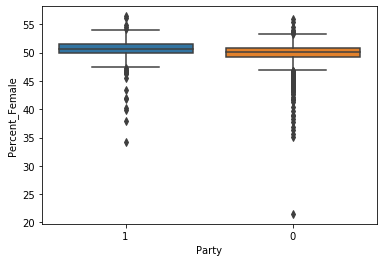

In [36]:
## Task8

# gender
sns.boxplot(x='Party', y='Percent_Female', data=data_merged, order=[1,0])

In [37]:
df_democratic['Percent_Female'].describe()

count    325.000000
mean      50.385433
std        2.149359
min       34.245291
25%       49.854280
50%       50.653830
75%       51.492075
max       56.418468
Name: Percent_Female, dtype: float64

In [38]:
df_republican['Percent_Female'].describe()

count    870.000000
mean      49.630898
std        2.429013
min       21.513413
25%       49.222905
50%       50.176792
75%       50.829770
max       55.885023
Name: Percent_Female, dtype: float64

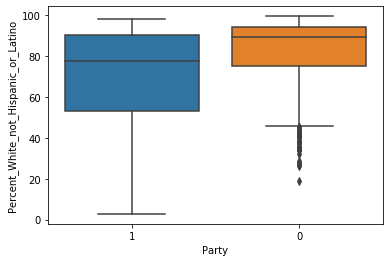

In [39]:
## Task8

# race (white)
sns.boxplot(x='Party', y='Percent_White_not_Hispanic_or_Latino', data=data_merged, order=[1,0])

In [40]:
df_democratic['Percent_White_not_Hispanic_or_Latino'].describe()

count    325.000000
mean      69.683766
std       24.981502
min        2.776702
25%       53.271579
50%       77.786090
75%       90.300749
max       98.063495
Name: Percent_White_not_Hispanic_or_Latino, dtype: float64

In [41]:
df_republican['Percent_White_not_Hispanic_or_Latino'].describe()

count    870.000000
mean      82.656646
std       16.056122
min       18.758977
25%       75.016397
50%       89.434849
75%       94.466596
max       99.627329
Name: Percent_White_not_Hispanic_or_Latino, dtype: float64

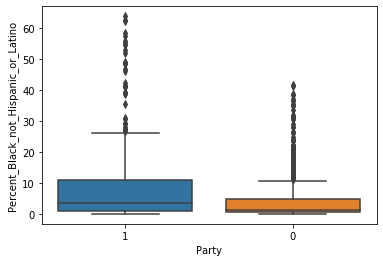

In [42]:
## Task8

# race (black)
sns.boxplot(x='Party', y='Percent_Black_not_Hispanic_or_Latino', data=data_merged, order=[1,0])

In [43]:
df_democratic['Percent_Black_not_Hispanic_or_Latino'].describe()

count    325.000000
mean       9.242649
std       13.351340
min        0.000000
25%        0.839103
50%        3.485992
75%       11.058843
max       63.953279
Name: Percent_Black_not_Hispanic_or_Latino, dtype: float64

In [44]:
df_republican['Percent_Black_not_Hispanic_or_Latino'].describe()

count    870.000000
mean       4.189241
std        6.721695
min        0.000000
25%        0.460419
50%        1.318311
75%        4.753831
max       41.563041
Name: Percent_Black_not_Hispanic_or_Latino, dtype: float64

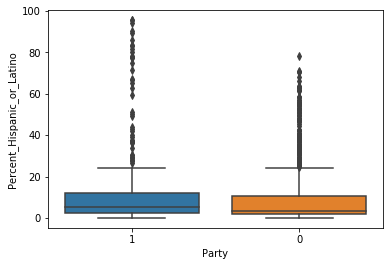

In [45]:
## Task8

# race (hispanic)
sns.boxplot(x='Party', y='Percent_Hispanic_or_Latino', data=data_merged, order=[1,0])

In [46]:
df_democratic['Percent_Hispanic_or_Latino'].describe()

count    325.000000
mean      12.587391
std       19.575030
min        0.193349
25%        2.531017
50%        5.039747
75%       11.857116
max       95.479801
Name: Percent_Hispanic_or_Latino, dtype: float64

In [47]:
df_republican['Percent_Hispanic_or_Latino'].describe()

count    870.000000
mean       9.733094
std       14.049576
min        0.000000
25%        1.704539
50%        3.427435
75%       10.709696
max       78.397012
Name: Percent_Hispanic_or_Latino, dtype: float64

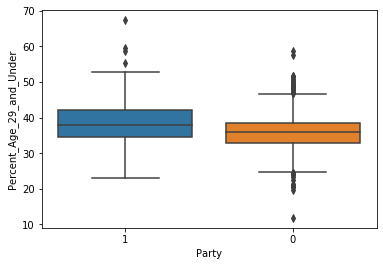

In [48]:
## Task8

# age (29 and under)
sns.boxplot(x='Party', y='Percent_Age_29_and_Under', data=data_merged, order=[1,0])

In [49]:
df_democratic['Percent_Age_29_and_Under'].describe()

count    325.000000
mean      38.726959
std        6.252786
min       23.156452
25%       34.488444
50%       38.074151
75%       42.161162
max       67.367823
Name: Percent_Age_29_and_Under, dtype: float64

In [50]:
df_republican['Percent_Age_29_and_Under'].describe()

count    870.000000
mean      36.005719
std        5.181522
min       11.842105
25%       32.983652
50%       35.846532
75%       38.539787
max       58.749116
Name: Percent_Age_29_and_Under, dtype: float64

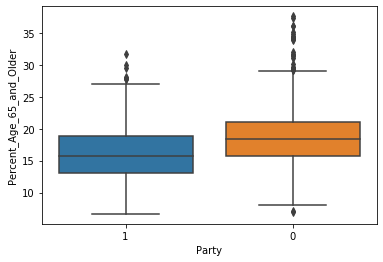

In [51]:
## Task8

# age (65 and older)
sns.boxplot(x='Party', y='Percent_Age_65_and_Older', data=data_merged, order=[1,0])

In [52]:
df_democratic['Percent_Age_65_and_Older'].describe()

count    325.000000
mean      16.194826
std        4.282422
min        6.653188
25%       13.106233
50%       15.698087
75%       18.806426
max       31.642106
Name: Percent_Age_65_and_Older, dtype: float64

In [53]:
df_republican['Percent_Age_65_and_Older'].describe()

count    870.000000
mean      18.828267
std        4.733155
min        6.954387
25%       15.784982
50%       18.377896
75%       21.112847
max       37.622759
Name: Percent_Age_65_and_Older, dtype: float64

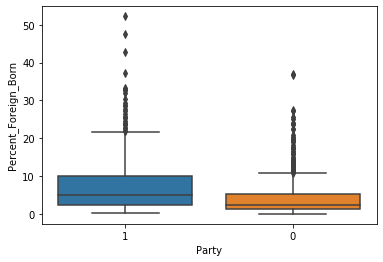

In [54]:
## Task8

# ethnicity
sns.boxplot(x='Party', y='Percent_Foreign_Born', data=data_merged, order=[1,0])

In [55]:
df_democratic['Percent_Foreign_Born'].describe()

count    325.000000
mean       7.986330
std        8.330740
min        0.179769
25%        2.470508
50%        5.105490
75%       10.144555
max       52.229868
Name: Percent_Foreign_Born, dtype: float64

In [56]:
df_republican['Percent_Foreign_Born'].describe()

count    870.000000
mean       3.990096
std        4.507786
min        0.000000
25%        1.320101
50%        2.326317
75%        5.149429
max       37.058317
Name: Percent_Foreign_Born, dtype: float64

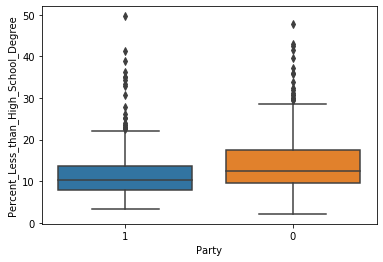

In [57]:
## Task8

# education (less than high school)
sns.boxplot(x='Party', y='Percent_Less_than_High_School_Degree', data=data_merged, order=[1,0])

In [58]:
df_democratic['Percent_Less_than_High_School_Degree'].describe()

count    325.000000
mean      11.883760
std        6.505613
min        3.215803
25%        7.893714
50%       10.370080
75%       13.637059
max       49.673777
Name: Percent_Less_than_High_School_Degree, dtype: float64

In [59]:
df_republican['Percent_Less_than_High_School_Degree'].describe()

count    870.000000
mean      14.009112
std        6.303126
min        2.134454
25%        9.662491
50%       12.572435
75%       17.447168
max       47.812773
Name: Percent_Less_than_High_School_Degree, dtype: float64

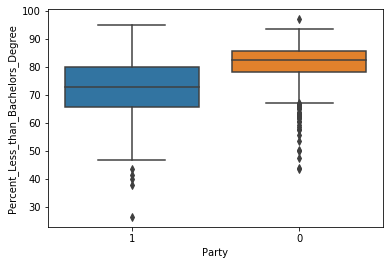

In [60]:
## Task8

# education (less than bachelor degree)
sns.boxplot(x='Party', y='Percent_Less_than_Bachelors_Degree', data=data_merged, order=[1,0])

In [61]:
df_democratic['Percent_Less_than_Bachelors_Degree'].describe()

count    325.000000
mean      71.968225
std       11.192404
min       26.335440
25%       65.711800
50%       72.736143
75%       79.903653
max       94.849957
Name: Percent_Less_than_Bachelors_Degree, dtype: float64

In [62]:
df_republican['Percent_Less_than_Bachelors_Degree'].describe()

count    870.000000
mean      81.095427
std        6.815537
min       43.419470
25%       78.108424
50%       82.406700
75%       85.546272
max       97.014925
Name: Percent_Less_than_Bachelors_Degree, dtype: float64

In [63]:
## Task8
# Seperate the Democratic Countries and displaying first 5 rows:
df_democratic_t8 = data_merged.loc[data_merged.Party == 1, :]

In [64]:
df_democratic_t8.head()

,State,County,Votes_Democratic,Votes_Republican,FIPS,Total_Population,Citizen_Voting-Age_Population,Percent_White_not_Hispanic_or_Latino,Percent_Black_not_Hispanic_or_Latino,Percent_Hispanic_or_Latino,...,Percent_Female,Percent_Age_29_and_Under,Percent_Age_65_and_Older,Median_Household_Income,Percent_Unemployed,Percent_Less_than_High_School_Degree,Percent_Less_than_Bachelors_Degree,Percent_Rural,Sum_Percent_Races,Party
0,AZ,apache,16298.0,7810.0,4001,72346,0,18.571863,0.486551,5.947806,...,50.598513,45.854643,13.322091,32460,15.807433,21.758252,88.941063,74.061076,25.006220,1
2,AZ,coconino,34240.0,19249.0,4005,138064,104265,54.619597,1.342855,13.711033,...,50.581614,48.946141,10.873943,51106,8.238305,11.085381,65.791439,31.466066,69.673485,1
6,AZ,maricopa,732671.0,672505.0,4013,4088549,2723565,56.918114,5.013612,30.286833,...,50.549278,41.886620,13.837843,55676,6.808454,13.051927,69.031137,2.363800,92.218560,1
9,AZ,pima,221242.0,160550.0,4019,1003338,0,53.271579,3.199719,36.105978,...,50.807405,40.087388,17.801778,46764,9.214114,12.252238,69.199391,7.523491,92.577277,1
10,AZ,santa cruz,9241.0,3828.0,4023,46547,27155,15.274883,0.199798,83.219112,...,52.125808,43.300320,15.895761,38941,9.749896,25.206726,77.506775,26.883172,98.693793,1


In [65]:
# General statistics about the data set for Democratic countries
democratic_desc = df_democratic_t8.describe()
democratic_desc
#In the below table we can observe all the descriptive statistics related to all the variables

,Votes_Democratic,Votes_Republican,FIPS,Total_Population,Citizen_Voting-Age_Population,Percent_White_not_Hispanic_or_Latino,Percent_Black_not_Hispanic_or_Latino,Percent_Hispanic_or_Latino,Percent_Foreign_Born,Percent_Female,Percent_Age_29_and_Under,Percent_Age_65_and_Older,Median_Household_Income,Percent_Unemployed,Percent_Less_than_High_School_Degree,Percent_Less_than_Bachelors_Degree,Percent_Rural,Sum_Percent_Races,Party
count,325.000000,325.000000,325.000000,3.250000e+02,3.250000e+02,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.0
mean,71193.172308,41322.861538,37130.873846,3.009983e+05,7.249500e+04,69.683766,9.242649,12.587391,7.986330,50.385433,38.726959,16.194826,53798.732308,6.908426,11.883760,71.968225,36.123281,91.513806,1.0
std,125306.803889,74689.108440,13860.571592,5.536000e+05,2.222767e+05,24.981502,13.351340,19.575030,8.330740,2.149359,6.252786,4.282422,15289.130077,2.763816,6.505613,11.192404,32.259481,13.176550,0.0
min,521.000000,220.000000,4001.000000,1.969000e+03,0.000000e+00,2.776702,0.000000,0.193349,0.179769,34.245291,23.156452,6.653188,21190.000000,0.313234,3.215803,26.335440,0.000000,15.099843,1.0
25%,5242.000000,3611.000000,27027.000000,2.364500e+04,0.000000e+00,53.271579,0.839103,2.531017,2.470508,49.854280,34.488444,13.106233,44140.000000,5.074594,7.893714,65.711800,5.928800,92.365994,1.0
50%,18159.000000,12348.000000,36103.000000,8.204900e+04,0.000000e+00,77.786090,3.485992,5.039747,5.105490,50.653830,38.074151,15.698087,51477.000000,6.617676,10.370080,72.736143,26.862739,95.045331,1.0
75%,72677.000000,46403.000000,51095.000000,2.847880e+05,3.441500e+04,90.300749,11.058843,11.857116,10.144555,51.492075,42.161162,18.806426,59132.000000,8.234271,13.637059,79.903653,60.670737,97.155076,1.0
max,881802.000000,672505.000000,56001.000000,4.434257e+06,2.723565e+06,98.063495,63.953279,95.479801,52.229868,56.418468,67.367823,31.642106,125672.000000,18.771186,49.673777,94.849957,100.000000,100.000000,1.0


In [66]:
# Seperate the Republic Counties and displaying first 5 rows:
df_republican_t8 = data_merged.loc[data_merged.Party == 0, :]

In [67]:
df_republican_t8.head()

,State,County,Votes_Democratic,Votes_Republican,FIPS,Total_Population,Citizen_Voting-Age_Population,Percent_White_not_Hispanic_or_Latino,Percent_Black_not_Hispanic_or_Latino,Percent_Hispanic_or_Latino,...,Percent_Female,Percent_Age_29_and_Under,Percent_Age_65_and_Older,Median_Household_Income,Percent_Unemployed,Percent_Less_than_High_School_Degree,Percent_Less_than_Bachelors_Degree,Percent_Rural,Sum_Percent_Races,Party
1,AZ,cochise,17383.0,26929.0,4003,128177,92915,56.299492,3.714395,34.403208,...,49.069646,37.902276,19.756275,45383,8.567108,13.409171,76.837055,36.301067,94.417095,0
3,AZ,gila,7643.0,12180.0,4007,53179,0,63.222325,0.552850,18.548675,...,50.296170,32.238290,26.397638,40593,12.129932,15.729958,82.262624,41.062000,82.323850,0
4,AZ,graham,3368.0,6870.0,4009,37529,0,51.461536,1.811932,32.097844,...,46.313518,46.393456,12.315809,47422,14.424104,14.580797,86.675944,46.437399,85.371313,0
5,AZ,la paz,1609.0,3265.0,4012,20304,15245,58.884949,0.379236,26.182033,...,48.946020,28.073286,36.056935,36321,10.599013,24.842215,89.563407,56.327786,85.446217,0
7,AZ,mohave,19214.0,50209.0,4015,203629,0,78.252606,0.951731,15.708470,...,49.676618,30.485835,26.858650,39856,11.680953,16.145850,88.121178,22.963644,94.912807,0


In [68]:
# General statistics about the data set for Democratic countries
republic_desc = df_republican_t8.describe()
republic_desc
#In the below table we can observe all the descriptive statistics related to all the variables

,Votes_Democratic,Votes_Republican,FIPS,Total_Population,Citizen_Voting-Age_Population,Percent_White_not_Hispanic_or_Latino,Percent_Black_not_Hispanic_or_Latino,Percent_Hispanic_or_Latino,Percent_Foreign_Born,Percent_Female,Percent_Age_29_and_Under,Percent_Age_65_and_Older,Median_Household_Income,Percent_Unemployed,Percent_Less_than_High_School_Degree,Percent_Less_than_Bachelors_Degree,Percent_Rural,Sum_Percent_Races,Party
count,870.000000,870.000000,870.000000,8.700000e+02,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.0
mean,7926.549425,12644.403448,38714.074713,5.386467e+04,17423.247126,82.656646,4.189241,9.733094,3.990096,49.630898,36.005719,18.828267,48746.819540,6.401764,14.009112,81.095427,63.274485,96.578982,0.0
std,17538.649168,22601.266060,12658.615292,9.419257e+04,47283.487587,16.056122,6.721695,14.049576,4.507786,2.429013,5.181522,4.733155,10670.729412,2.766060,6.303126,6.815537,28.766224,3.873292,0.0
min,6.000000,46.000000,4003.000000,7.600000e+01,0.000000,18.758977,0.000000,0.000000,0.000000,21.513413,11.842105,6.954387,24000.000000,0.000000,2.134454,43.419470,0.000000,50.592021,0.0
25%,951.500000,2544.000000,30073.500000,9.559500e+03,0.000000,75.016397,0.460419,1.704539,1.320101,49.222905,32.983652,15.784982,41506.500000,4.558432,9.662491,78.108424,40.738057,96.367230,0.0
50%,2807.500000,5932.500000,42040.000000,2.546500e+04,0.000000,89.434849,1.318311,3.427435,2.326317,50.176792,35.846532,18.377896,47168.500000,6.376338,12.572435,82.406700,63.415088,97.517132,0.0
75%,7010.750000,12632.750000,48342.500000,5.372100e+04,15635.000000,94.466596,4.753831,10.709696,5.149429,50.829770,38.539787,21.112847,53423.250000,8.069736,17.447168,85.546272,91.701077,98.241466,0.0
max,215190.000000,219990.000000,56043.000000,1.092518e+06,460215.000000,99.627329,41.563041,78.397012,37.058317,55.885023,58.749116,37.622759,108177.000000,18.525791,47.812773,97.014925,100.000000,100.000000,0.0


Text(0.5, 1.0, 'Republican')

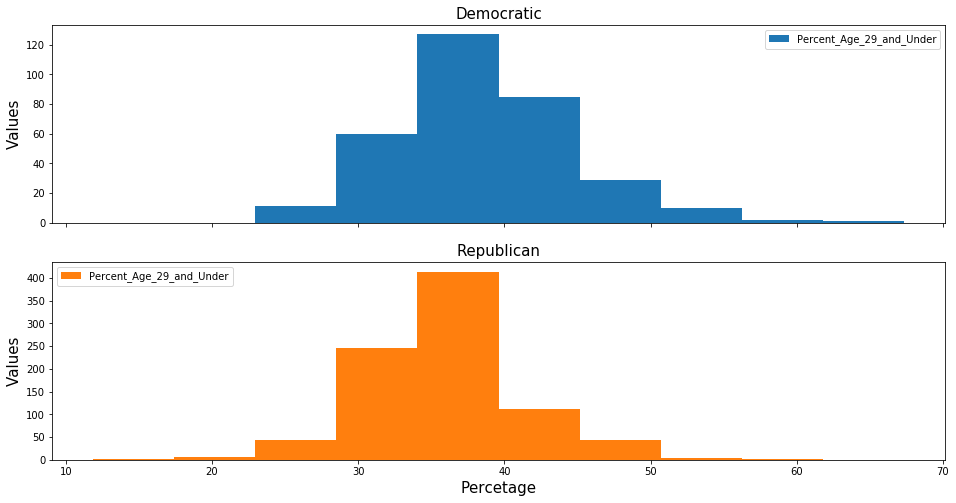

In [78]:
# Age Comparison : Democratic Vs Republic
#Hitogram for Percent Age 29 and Under

Percent_Age_29 = pd.DataFrame([df_democratic_t8['Percent_Age_29_and_Under'],df_republican_t8['Percent_Age_29_and_Under']])
# Convert row to column 
Percent_Age_29 = Percent_Age_29.transpose()
# Creatinng a bar plot
axes = Percent_Age_29.plot.hist(rot=0, subplots=True,figsize = (16,8))
axes[1].legend(loc=2)
#subplot for Democratic

axes[0].set_xlabel("Percetage",fontsize=15)
axes[0].set_ylabel("Values",fontsize=15)


axes[1].set_xlabel("Percetage",fontsize=15)
axes[1].set_ylabel("Values",fontsize=15)


axes[0].set_title('Democratic',fontsize = 15)
# Subplot for Republic
axes[1].set_title('Republican',fontsize = 15)

Text(0.5, 1.0, 'Republican')

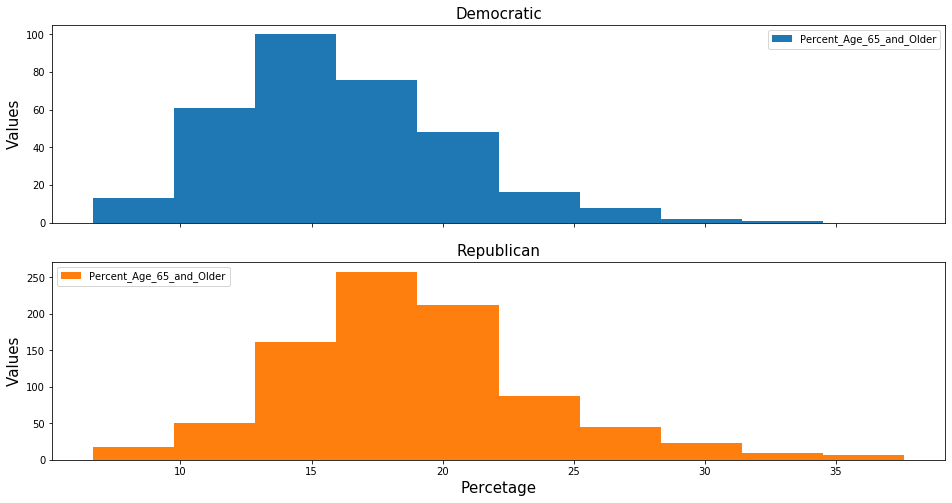

In [79]:
# Histogram for Percent Age 65 and Older
Percent_Age_65 = pd.DataFrame([df_democratic_t8['Percent_Age_65_and_Older'],df_republican_t8['Percent_Age_65_and_Older']])
# Convert row to column 
Percent_Age_65 = Percent_Age_65.transpose()
# Creatinng a bar plot
axes = Percent_Age_65.plot.hist(rot=0, subplots=True,figsize = (16,8))
axes[1].legend(loc=2)
#subplot for Democratic

axes[0].set_xlabel("Percetage",fontsize=15)
axes[0].set_ylabel("Values",fontsize=15)


axes[1].set_xlabel("Percetage",fontsize=15)
axes[1].set_ylabel("Values",fontsize=15)


axes[0].set_title('Democratic',fontsize = 15)
# Subplot for Republic
axes[1].set_title('Republican',fontsize = 15)

Text(0.5, 1.0, 'Republican')

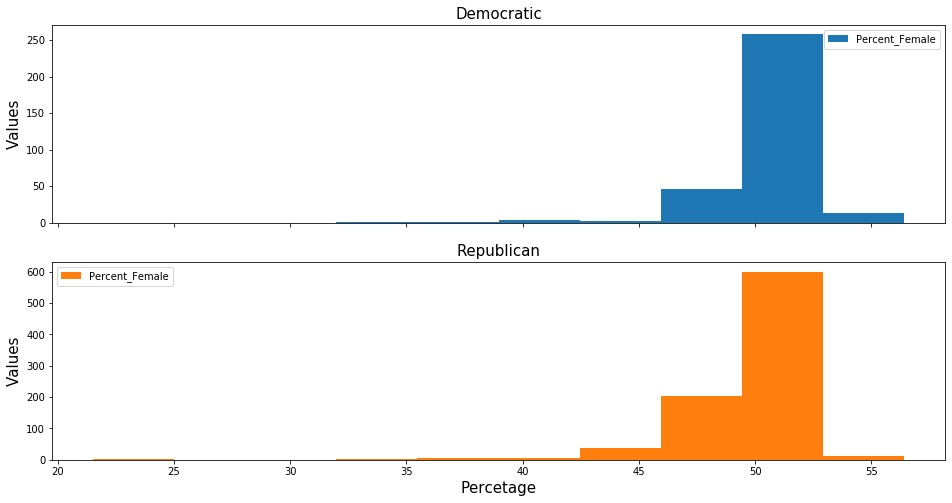

In [80]:
#Gender Comparison: Democratic Vs Republic
Percent_Female = pd.DataFrame([df_democratic_t8['Percent_Female'],df_republican_t8['Percent_Female']])
# Convert row to column 
Percent_Female = Percent_Female.transpose()
# Creatinng a bar plot
axes = Percent_Female.plot.hist(rot=0, subplots=True,figsize = (16,8))
axes[1].legend(loc=2)
#subplot for Democratic

axes[0].set_xlabel("Percetage",fontsize=15)
axes[0].set_ylabel("Values",fontsize=15)


axes[1].set_xlabel("Percetage",fontsize=15)
axes[1].set_ylabel("Values",fontsize=15)



axes[0].set_title('Democratic',fontsize = 15)
# Subplot for Republic
axes[1].set_title('Republican',fontsize = 15)

Text(0.5, 1.0, 'Republican')

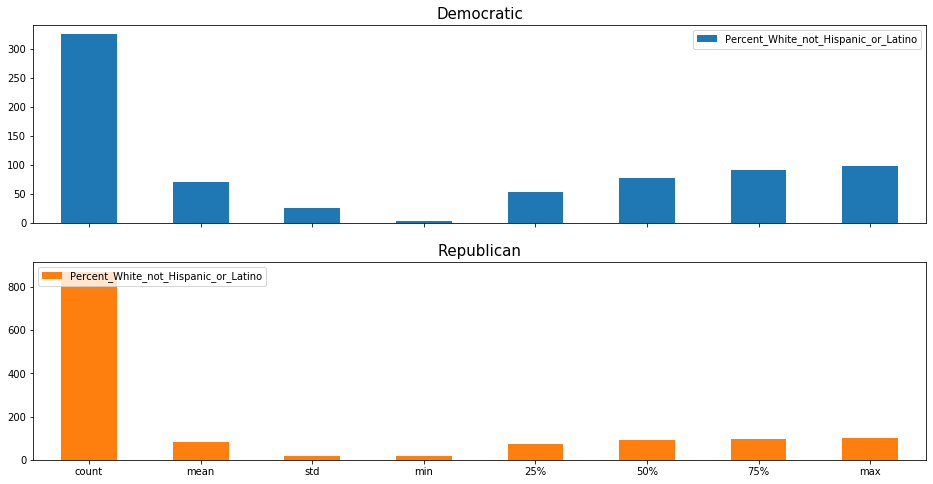

In [81]:
# Race and Ethnicity Comparison: Democratic Vs Republic
#Descriptive Statistic for Percent White, not Hispanic or Latino
Percent_White = pd.DataFrame([democratic_desc['Percent_White_not_Hispanic_or_Latino'],republic_desc['Percent_White_not_Hispanic_or_Latino']])
# Convert row to column 
Percent_White = Percent_White.transpose()
# Creatinng a bar plot
axes = Percent_White.plot.bar(rot=0, subplots=True,figsize = (16,8))
axes[1].legend(loc=2)
#subplot for Democratic
axes[0].set_title('Democratic',fontsize = 15)
# Subplot for Republic
axes[1].set_title('Republican',fontsize = 15)


Text(0.5, 1.0, 'Republican')

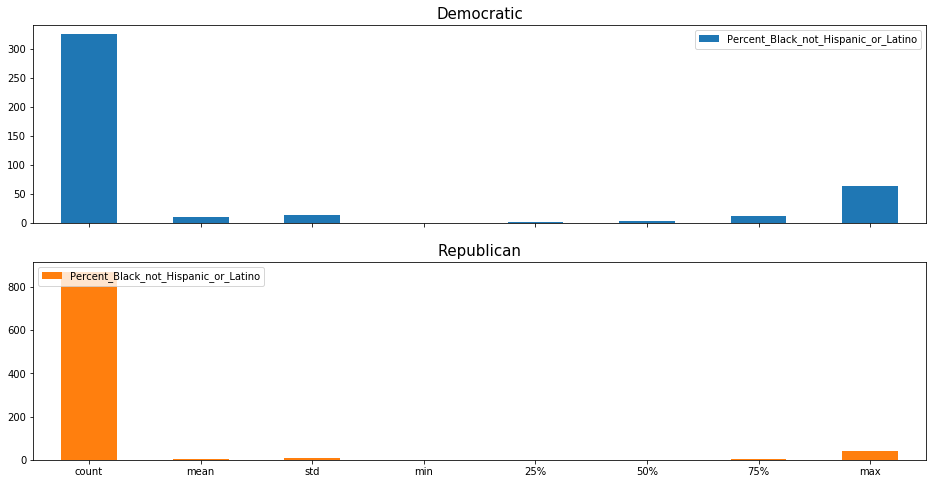

In [82]:
#Descriptive Statistic for Percent Black, not Hispanic or Latino
Percent_Black = pd.DataFrame([democratic_desc['Percent_Black_not_Hispanic_or_Latino'],republic_desc['Percent_Black_not_Hispanic_or_Latino']])
# taking transpose
Percent_Black = Percent_Black.transpose()
# Creatinng a bar plot
axes = Percent_Black.plot.bar(rot=0, subplots=True,figsize = (16,8))
axes[1].legend(loc=2)
#subplot for Democratic
axes[0].set_title('Democratic',fontsize = 15)
# Subplot for Republic
axes[1].set_title('Republican',fontsize = 15)

Text(0.5, 1.0, 'Republican')

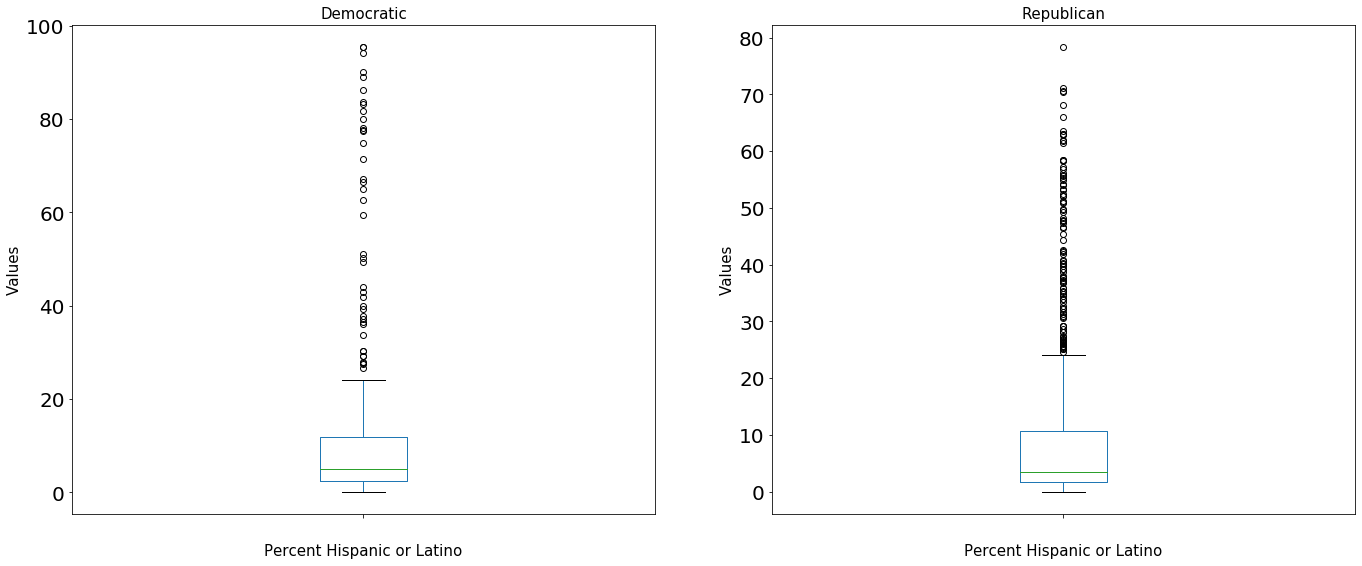

In [83]:
#Descriptive Statistic for Percent Hispanic or Latino
#selecting two col. and 1 rows for subplots
fig, axes = plt.subplots(nrows=1, ncols=2)
#subplot for Democratic
ax = df_democratic_t8['Percent_Hispanic_or_Latino'].plot(ax=axes[0],kind = 'box',figsize=(23,9),label=' ',fontsize=20,legend=True,title='')
#subplot for Republic
ay = df_republican_t8['Percent_Hispanic_or_Latino'].plot(ax=axes[1],kind = 'box',figsize=(23,9),label=' ',fontsize=20,legend=True,title='')

# setting x labels 
ax.set_xlabel("Percent Hispanic or Latino",fontsize=15)
ay.set_xlabel("Percent Hispanic or Latino",fontsize=15)
#setting y label
ax.set_ylabel("Values",fontsize=15)
ay.set_ylabel("Values",fontsize=15)
#title
ax.set_title('Democratic',fontsize=15 )
ay.set_title('Republican',fontsize=15 )

Text(0.5, 1.0, 'Republican')

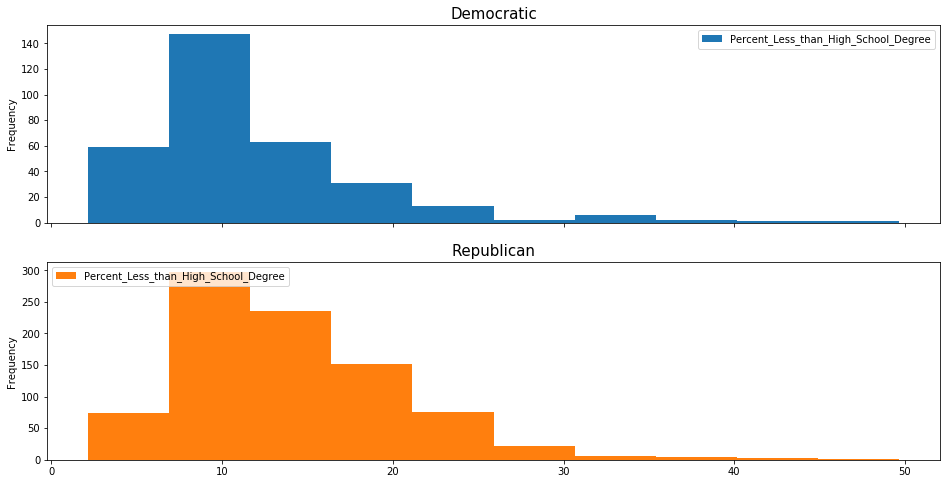

In [84]:
#Comparison of Education: Democratic Vs Republic
#Histogram Distribution for Percent Less than High School Degree
School_Degree = pd.DataFrame([df_democratic_t8['Percent_Less_than_High_School_Degree'],df_republican_t8['Percent_Less_than_High_School_Degree']])
# taking transpose
School_Degree = School_Degree.transpose()
# Creatinng a histograme 
axes = School_Degree.plot.hist(rot=0, subplots=True,figsize = (16,8))
axes[1].legend(loc=2)
#subplot for Democratic
axes[0].set_title('Democratic',fontsize = 15)
# Subplot for Republic
axes[1].set_title('Republican',fontsize = 15)


Text(0.5, 1.0, 'Republican')

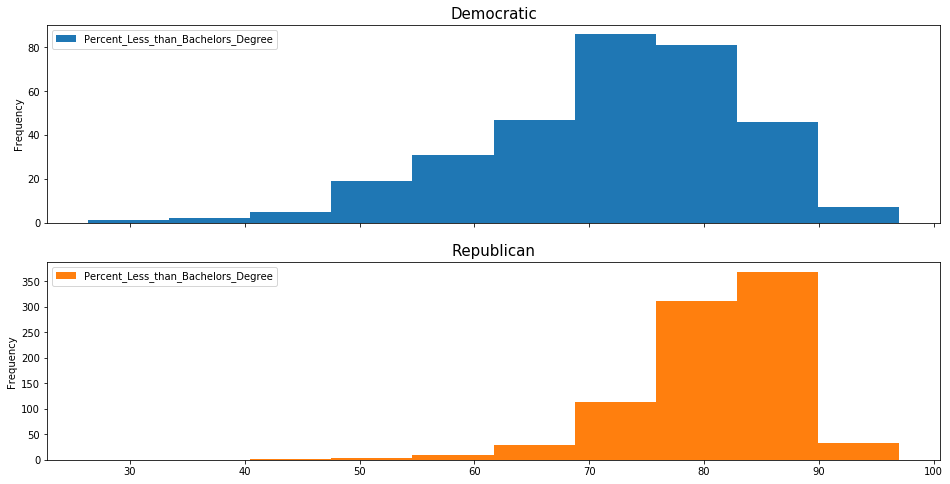

In [85]:
#Histogram Distribution for Percent Less than Bachelor's Degree
School_Degree = pd.DataFrame([df_democratic_t8["Percent_Less_than_Bachelors_Degree"],df_republican_t8["Percent_Less_than_Bachelors_Degree"]])
School_Degree = School_Degree.transpose()
# Creatinng a histograme 
axes = School_Degree.plot.hist(rot=0, subplots=True,figsize = (16,8))
axes[1].legend(loc=2)
#subplot for Democratic
axes[0].set_title('Democratic',fontsize = 15)
# Subplot for Republic
axes[1].set_title('Republican',fontsize = 15)

In [1]:
## Task10

import plotly.figure_factory as ff

import numpy as np
import pandas as pd

colorscale = ['#FFA500','#8B0000']

fips = data_merged['FIPS'].tolist()
values = data_merged['Party'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    county_outline={'color': 'rgb(15,15,15)', 'width': 0.5},
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Supporting Party by County (1: democratic, 0: republican)',
    legend_title='County'
    sort=True
)

fig.layout.template = None

fig.show()

SyntaxError: invalid syntax (<ipython-input-1-da1323f9f813>, line 21)